In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.shape

(100000, 9)

In [8]:
# distribution of outcome variable
df.diabetes.value_counts()*100/len(df)

0    91.5
1     8.5
Name: diabetes, dtype: float64

In [9]:
df['diabetes'].value_counts()*100/len(df)

0    91.5
1     8.5
Name: diabetes, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

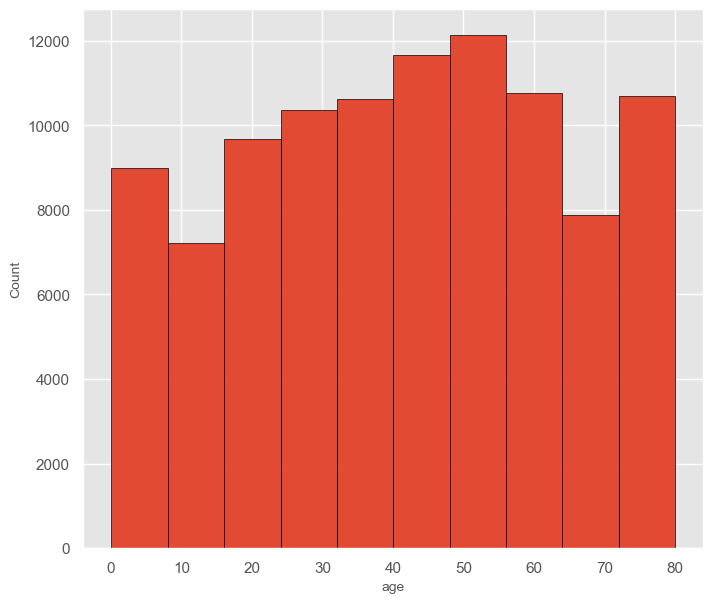

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['age'].hist(edgecolor="black")

In [11]:
df['age'].max()

80.0

In [12]:
df['age'].min()

0.08

In [13]:
print("MAX AGE: "+str(df['age'].max()))
print("MIN AGE: "+str(df['age'].min()))

MAX AGE: 80.0
MIN AGE: 0.08


In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

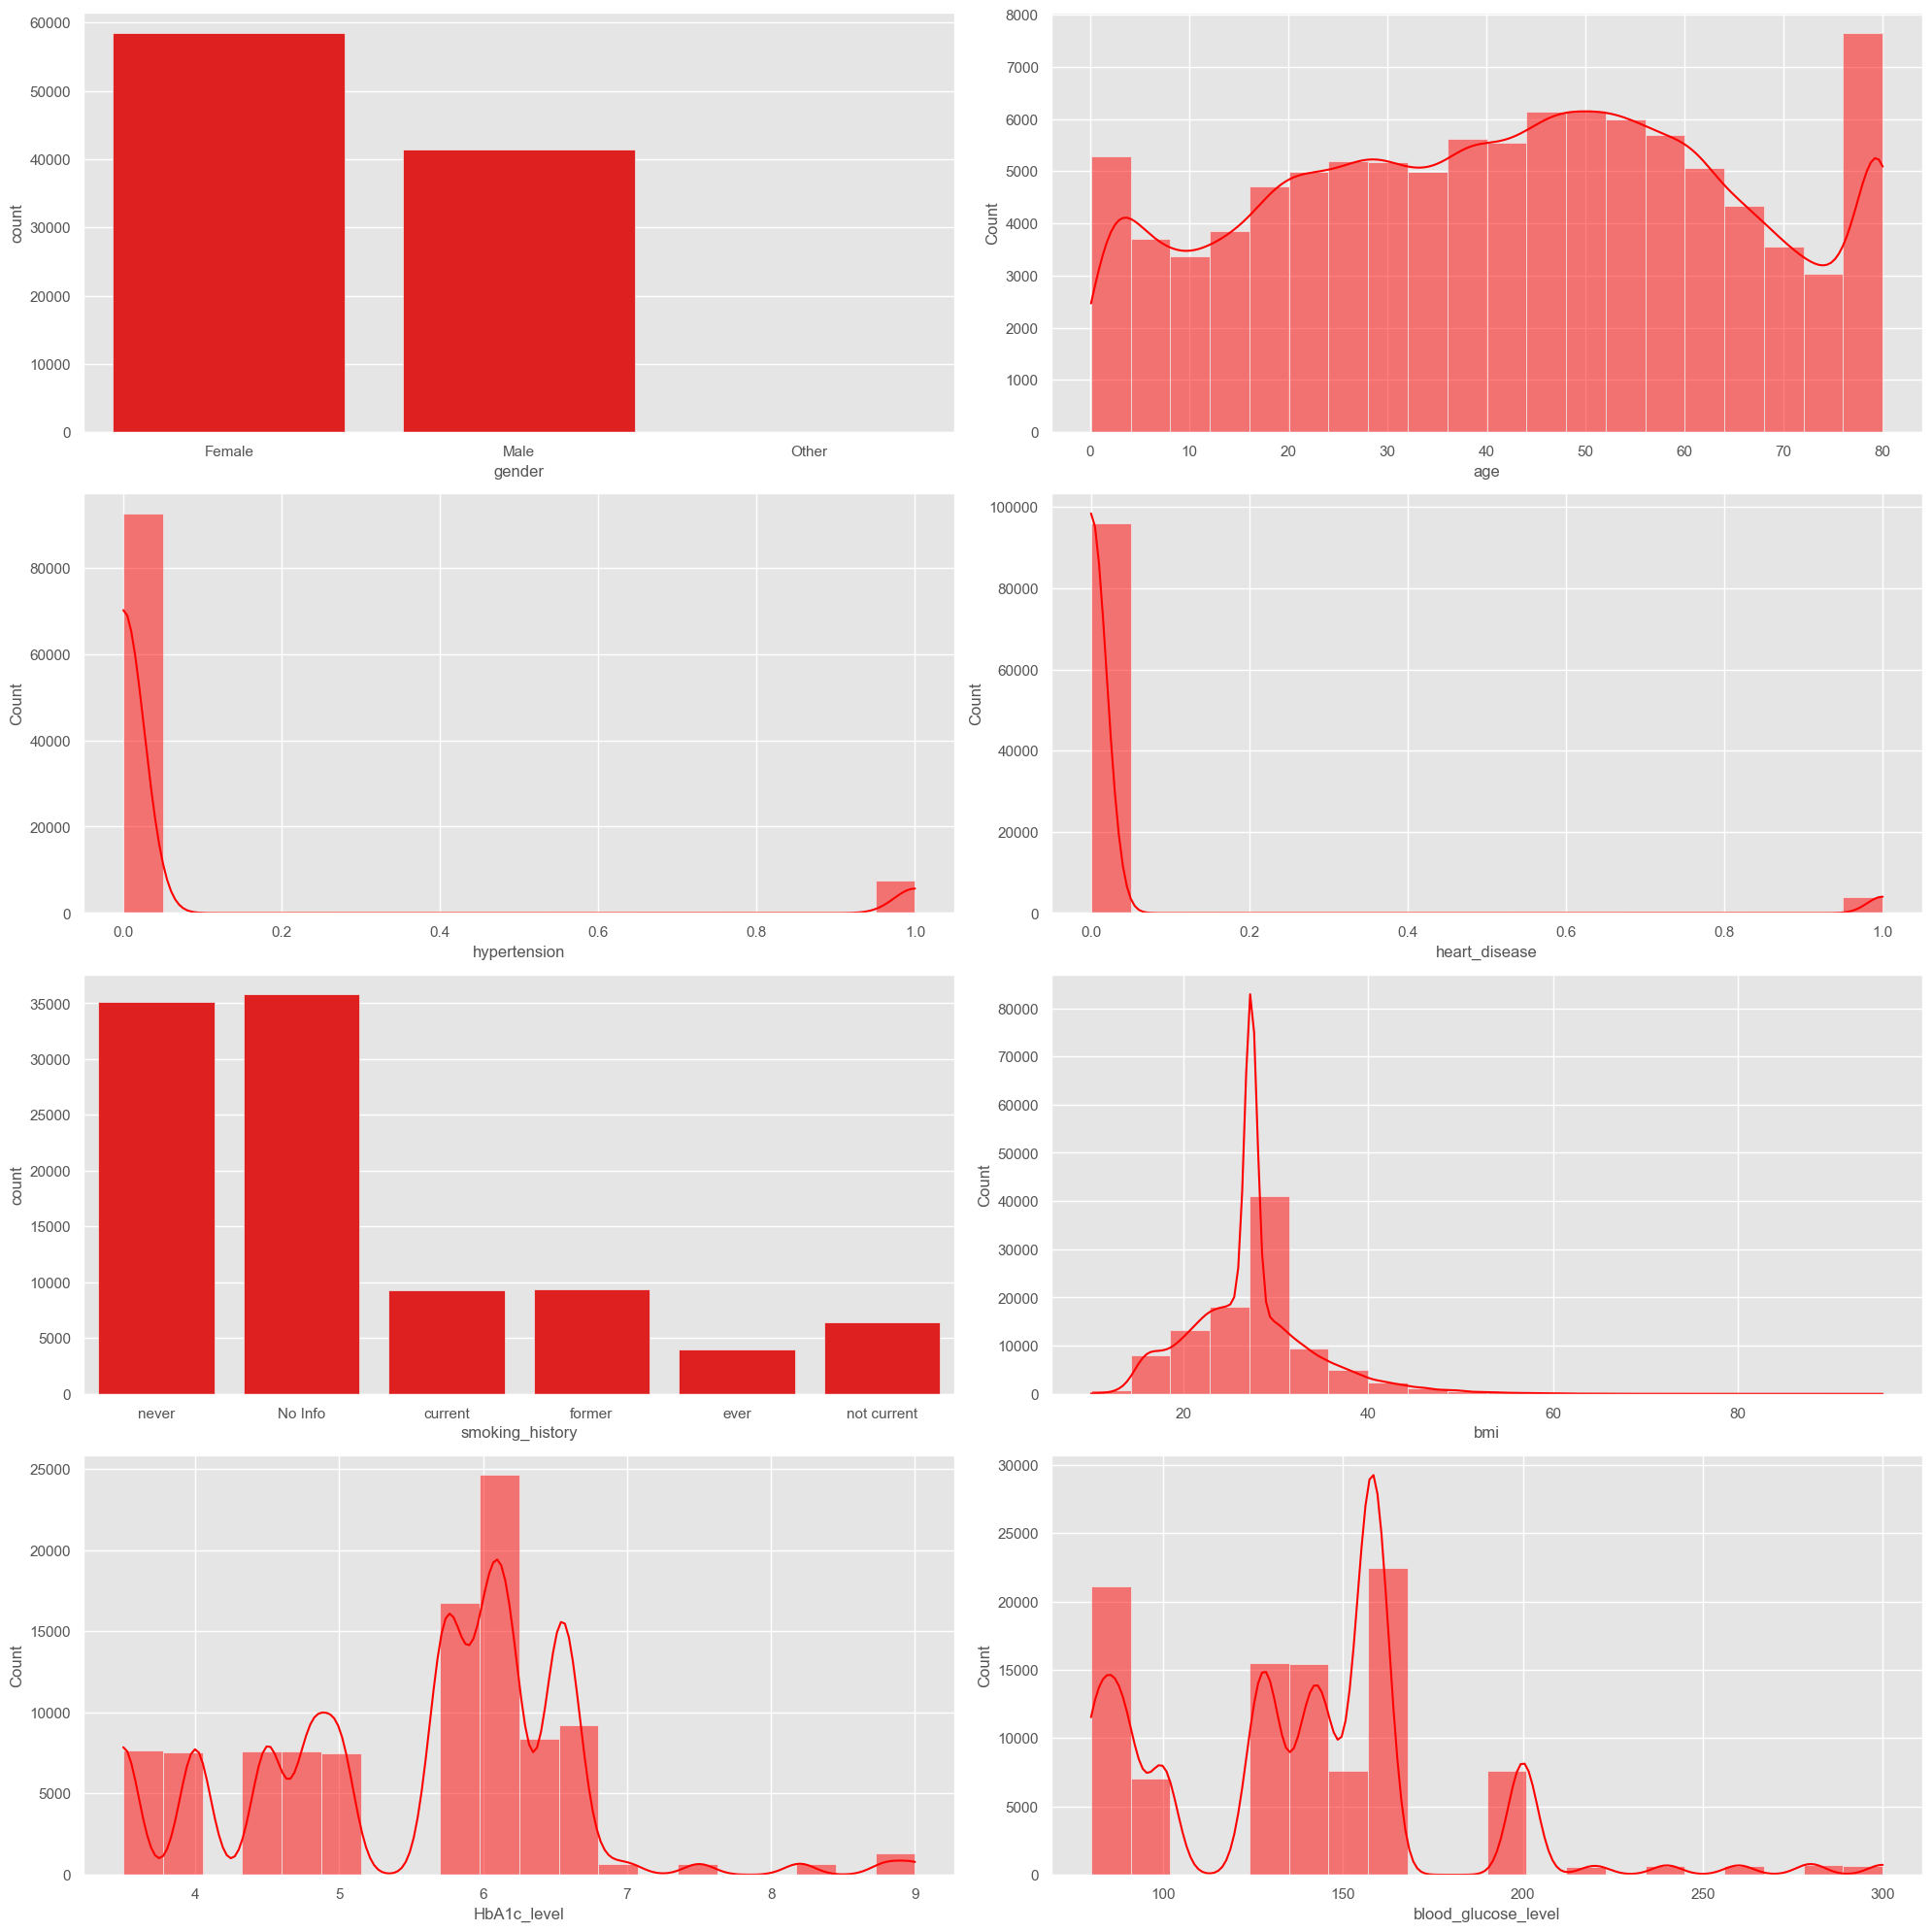

In [15]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

# Create a 4x2 grid of subplots
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Plot for categorical columns (e.g., gender, smoking_history)
sns.countplot(data=df, x='gender', ax=ax[0, 0], color='red')
sns.countplot(data=df, x='smoking_history', ax=ax[2, 0], color='red')

# Plot for numerical columns (e.g., age, bmi, HbA1c_level, etc.)
sns.histplot(data=df, x='age', bins=20, ax=ax[0, 1], color='red', kde=True)
sns.histplot(data=df, x='hypertension', bins=20, ax=ax[1, 0], color='red', kde=True)
sns.histplot(data=df, x='heart_disease', bins=20, ax=ax[1, 1], color='red', kde=True)
sns.histplot(data=df, x='bmi', bins=20, ax=ax[2, 1], color='red', kde=True)
sns.histplot(data=df, x='HbA1c_level', bins=20, ax=ax[3, 0], color='red', kde=True)
sns.histplot(data=df, x='blood_glucose_level', bins=20, ax=ax[3, 1], color='red', kde=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [17]:
df.groupby("diabetes").agg({'gender': 'count'}) 

,gender
diabetes,
0,91500
1,8500


In [18]:
df.groupby("diabetes").agg({'gender': 'max'}) 

,gender
diabetes,
0,Other
1,Male


In [19]:
df.groupby("diabetes").agg({'age': 'count'}) 

,age
diabetes,
0,91500
1,8500


In [20]:
df.groupby("diabetes").agg({'age': 'max'}) 

,age
diabetes,
0,80.0
1,80.0


In [21]:
df.groupby("diabetes").agg({'hypertension': 'count'}) 

,hypertension
diabetes,
0,91500
1,8500


In [22]:
df.groupby("diabetes").agg({'hypertension': 'max'}) 

,hypertension
diabetes,
0,1
1,1


In [23]:
df.groupby("diabetes").agg({'heart_disease': 'count'}) 

,heart_disease
diabetes,
0,91500
1,8500


In [24]:
df.groupby("diabetes").agg({'heart_disease': 'count'}) 

,heart_disease
diabetes,
0,91500
1,8500


In [25]:
df.groupby("diabetes").agg({'smoking_history': 'count'}) 

,smoking_history
diabetes,
0,91500
1,8500


In [26]:
df.groupby("diabetes").agg({'smoking_history': 'max'}) 

,smoking_history
diabetes,
0,not current
1,not current


In [27]:
df.groupby("diabetes").agg({'bmi': 'count'}) 

,bmi
diabetes,
0,91500
1,8500


In [28]:
df.groupby("diabetes").agg({'bmi': 'max'}) 

,bmi
diabetes,
0,95.69
1,88.72


In [29]:
df.groupby("diabetes").agg({'HbA1c_level': 'count'}) 

,HbA1c_level
diabetes,
0,91500
1,8500


In [30]:
df.groupby("diabetes").agg({'HbA1c_level': 'max'}) 

,HbA1c_level
diabetes,
0,6.6
1,9.0


In [31]:
df.groupby("diabetes").agg({'blood_glucose_level': 'count'}) 

,blood_glucose_level
diabetes,
0,91500
1,8500


In [32]:
df.groupby("diabetes").agg({'blood_glucose_level': 'max'}) 

,blood_glucose_level
diabetes,
0,200
1,300


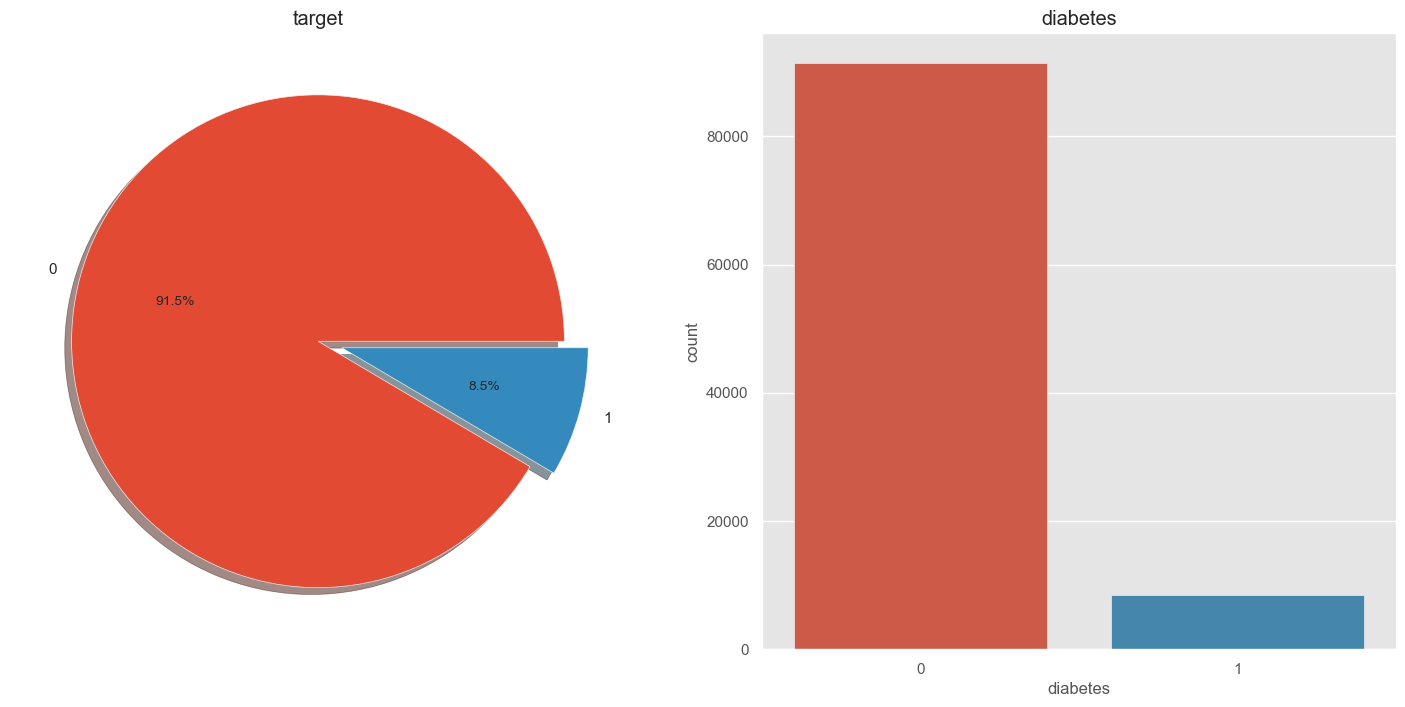

In [33]:
# 0>healthy
# 1>diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('diabetes', data=df, ax=ax[1])
ax[1].set_title('diabetes')
plt.show()

In [34]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


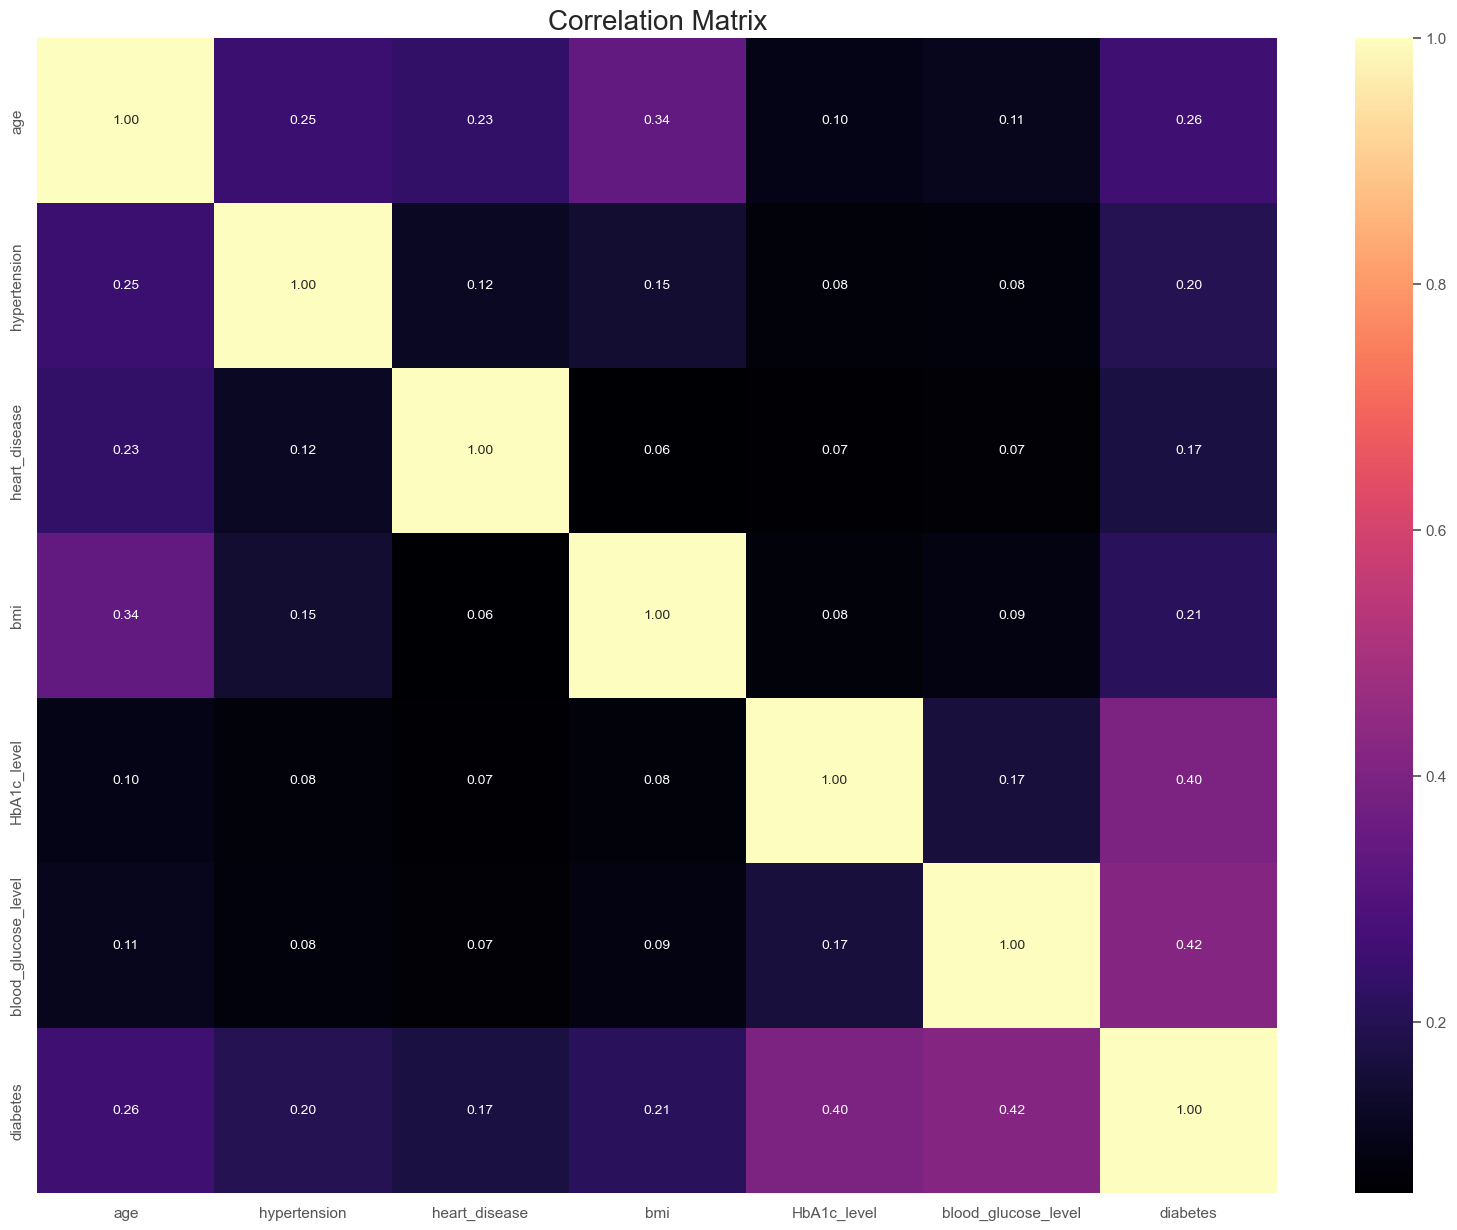

In [35]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [36]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [37]:
df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']] = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].replace(0, np.NaN)

In [38]:
# Data preprocessing Part
df.isnull().sum()

gender                     0
age                        0
hypertension           92515
heart_disease          96058
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes               91500
dtype: int64

In [39]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,NaN,1.0,never,25.19,6.6,140,NaN
1,Female,54.0,NaN,NaN,No Info,27.32,6.6,80,NaN
2,Male,28.0,NaN,NaN,never,27.32,5.7,158,NaN
3,Female,36.0,NaN,NaN,current,23.45,5.0,155,NaN
4,Male,76.0,1.0,1.0,current,20.14,4.8,155,NaN


<AxesSubplot:>

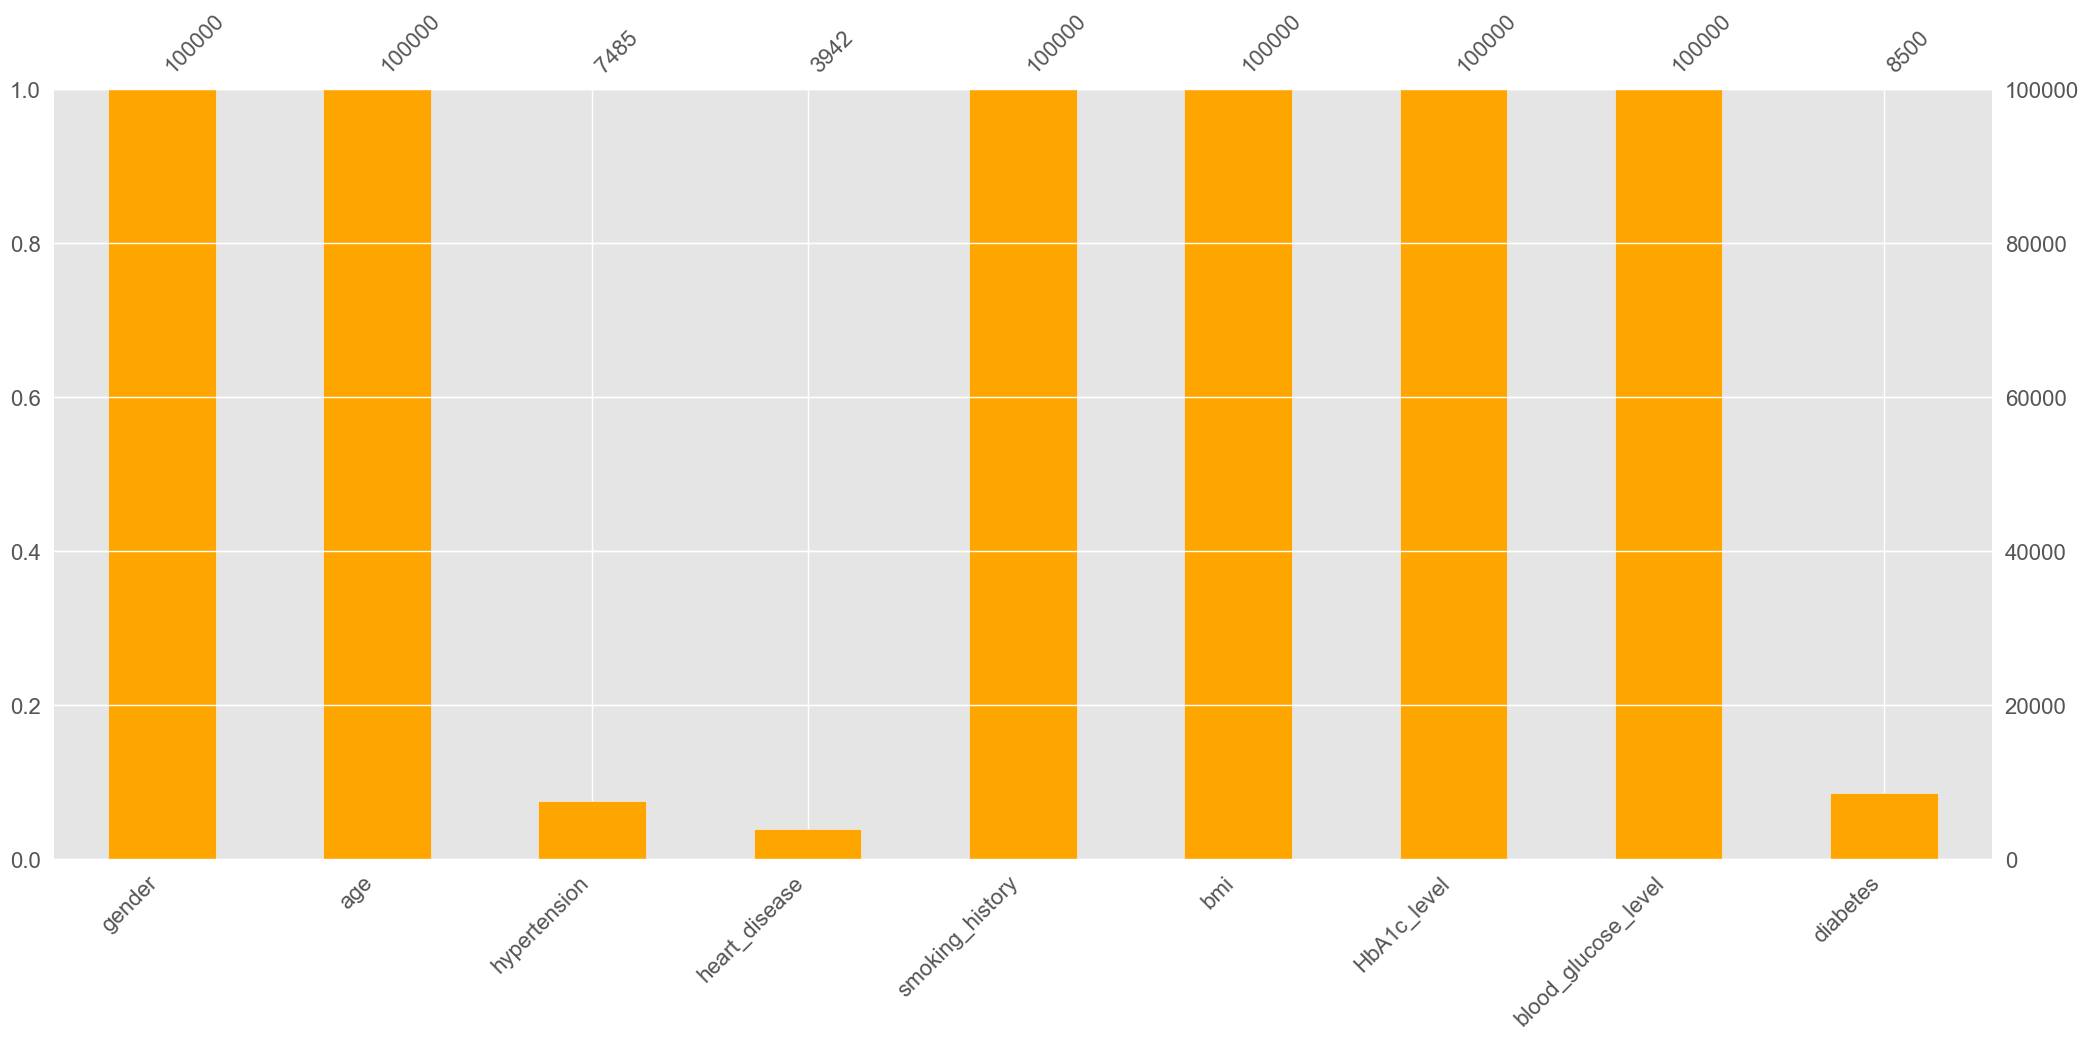

In [40]:
import missingno as msno
msno.bar(df, color="orange")

In [41]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'diabetes']].groupby(['diabetes'])[[var]].median().reset_index()
    return temp

In [42]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,NaN,1.0,never,25.19,6.6,140,NaN
1,Female,54.0,NaN,NaN,No Info,27.32,6.6,80,NaN
2,Male,28.0,NaN,NaN,never,27.32,5.7,158,NaN
3,Female,36.0,NaN,NaN,current,23.45,5.0,155,NaN
4,Male,76.0,1.0,1.0,current,20.14,4.8,155,NaN


In [43]:
df.isnull().sum()

gender                     0
age                        0
hypertension           92515
heart_disease          96058
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes               91500
dtype: int64

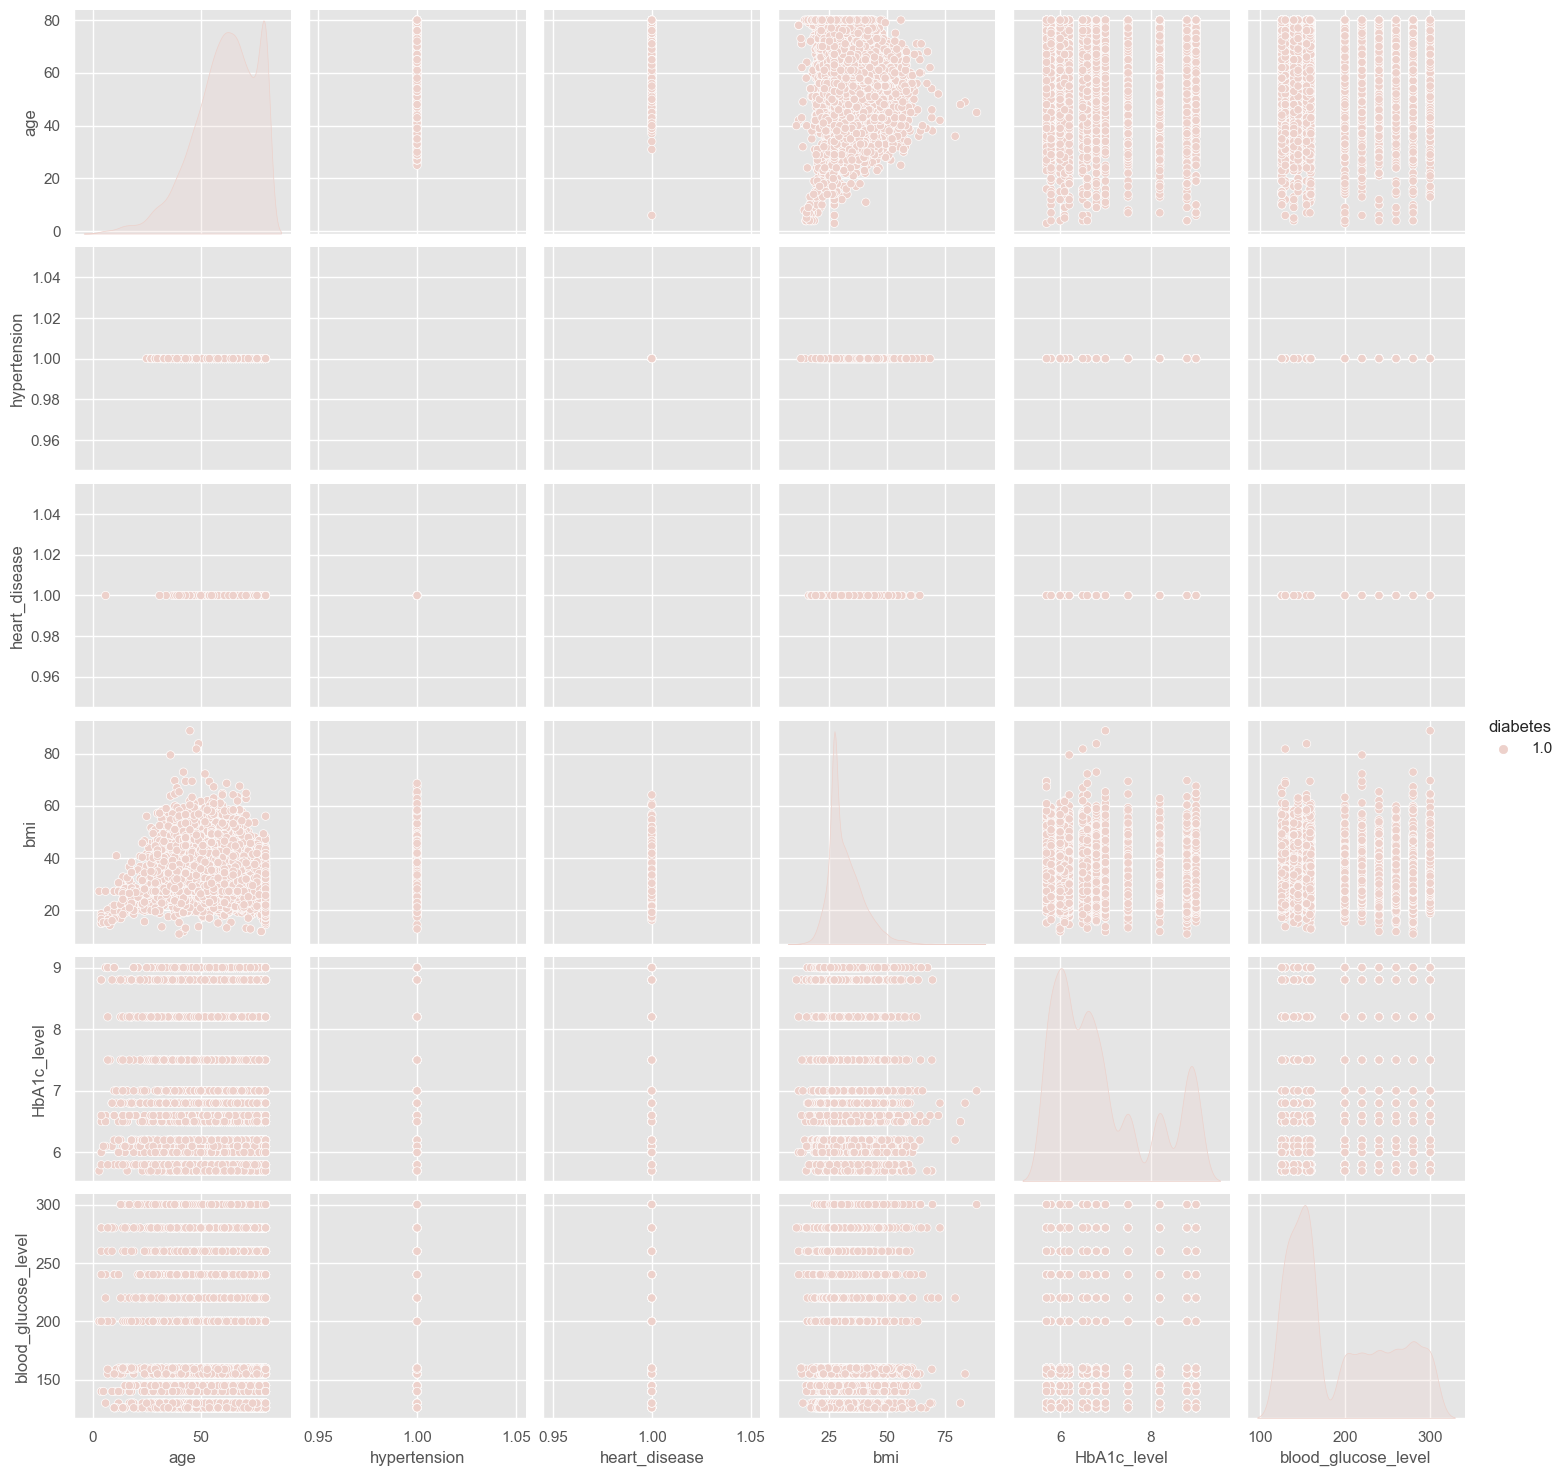

In [44]:
# pair plot
p = sns.pairplot(df, hue="diabetes")

In [45]:
df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']] = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].replace(np.NaN, 0)

In [46]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155,0.0


In [47]:
for feature in df.columns:
    if df[feature].dtype in ['object', 'category']:  # Check for non-numeric columns
        print(f"{feature}: Skipped (Non-numeric column)")
    else:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        if df[df[feature] > upper].any(axis=None):
            print(f"{feature}: Yes (Outliers detected)")
        else:
            print(f"{feature}: No (No outliers detected)")

gender: Skipped (Non-numeric column)
age: No (No outliers detected)
hypertension: Yes (Outliers detected)
heart_disease: Yes (Outliers detected)
smoking_history: Skipped (Non-numeric column)
bmi: Yes (Outliers detected)
HbA1c_level: Yes (Outliers detected)
blood_glucose_level: Yes (Outliers detected)
diabetes: Yes (Outliers detected)


<AxesSubplot:xlabel='blood_glucose_level'>

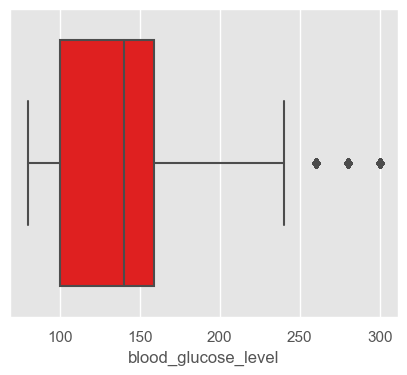

In [48]:
plt.figure(figsize=(5,4))
sns.boxplot(x= df["blood_glucose_level"], color="red")

In [49]:
Q1 = df.blood_glucose_level.quantile(0.25)
Q3 = df.blood_glucose_level.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['blood_glucose_level']>upper, "blood_glucose_level"] = upper

<AxesSubplot:xlabel='blood_glucose_level'>

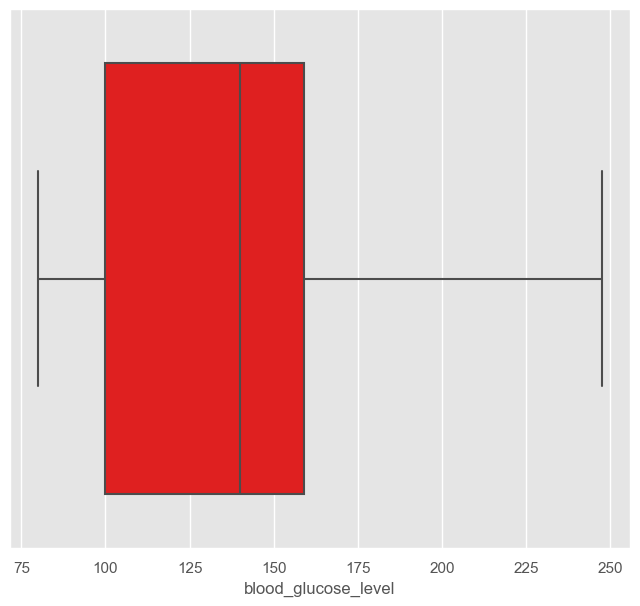

In [50]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["blood_glucose_level"], color="red")

In [51]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


<AxesSubplot:xlabel='HbA1c_level'>

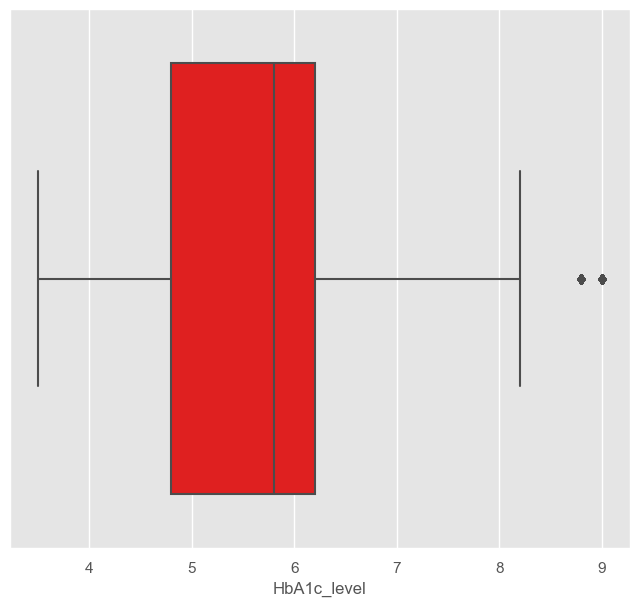

In [52]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["HbA1c_level"], color="red")

In [53]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
lof = LocalOutlierFactor(n_neighbors=10)
df['Outlier'] = lof.fit_predict(df)
print(df)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0           0.0            1.0                4  25.19   
1           0  54.0           0.0            0.0                0  27.32   
2           1  28.0           0.0            0.0                4  27.32   
3           0  36.0           0.0            0.0                1  23.45   
4           1  76.0           1.0            1.0                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0           0.0            0.0                0  27.32   
99996       0   2.0           0.0            0.0                0  17.37   
99997       1  66.0           0.0            0.0                3  27.83   
99998       0  24.0           0.0            0.0                4  35.42   
99999       0  57.0           0.0            0.0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  Outlier  
0              6.6        

In [54]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Outlier
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0,1
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0,1
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0,1
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0,1
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0,1


In [55]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-9.3834773 , -9.11745306, -7.33201545, -7.33201545, -5.91294905,
       -5.65670034, -5.62025245, -5.22120092, -5.13884354, -4.98572498,
       -4.75971529, -4.71129413, -4.30688828, -4.28028766, -4.24074394,
       -4.23724465, -4.0970789 , -4.01837758, -3.86824879, -3.81856593])

In [56]:
thresold = np.sort(df_scores)[7]

In [57]:
thresold

-5.221200922727194

In [58]:
outlier = df_scores>thresold

In [59]:
df = df[outlier]

In [60]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Outlier
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0,1
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0,1
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0,1
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0,1
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0,1


In [61]:
df.shape

(99992, 10)

<AxesSubplot:xlabel='HbA1c_level'>

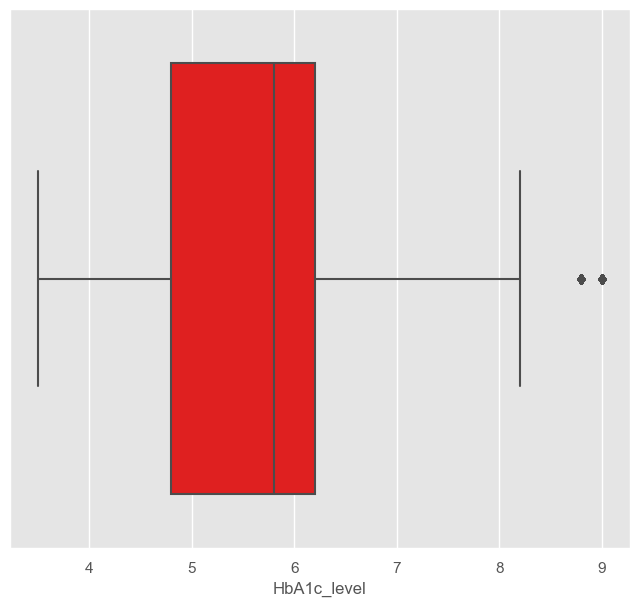

In [62]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["HbA1c_level"], color="red")

In [63]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [64]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [65]:
df['NewBMI'] = NewBMI
df.loc[df["bmi"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["bmi"]>18.5) & df["bmi"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["bmi"]>24.9) & df["bmi"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["bmi"]>29.9) & df["bmi"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["bmi"]>34.9) & df["bmi"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["bmi"]>39.9, "NewBMI"] = NewBMI[5]

In [66]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Outlier,NewBMI
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0,1,Obesity 2
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0,1,Obesity 2
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0,1,Obesity 2
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0,1,Obesity 2
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0,1,Obesity 2


In [67]:
# if insulin>=16 & insuline<=166->normal
def set_HbA1c_level(row):
    if row["HbA1c_level"]>=4 and row["HbA1c_level"]<=6.5:
        return "Normal"
    else:
        return "Abnormal"

In [68]:
df = df.assign(New_HbA1c_level=df.apply(set_HbA1c_level, axis=1))


In [69]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Outlier,NewBMI,New_HbA1c_level
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0,1,Obesity 2,Abnormal
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0,1,Obesity 2,Abnormal
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0,1,Obesity 2,Normal
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0,1,Obesity 2,Normal
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0,1,Obesity 2,Normal


In [70]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["blood_glucose_level"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["blood_glucose_level"] > 70) & (df["blood_glucose_level"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["blood_glucose_level"] > 99) & (df["blood_glucose_level"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["blood_glucose_level"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [71]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Outlier,NewBMI,New_HbA1c_level,NewGlucose
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0,1,Obesity 2,Abnormal,Secret
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0,1,Obesity 2,Abnormal,Normal
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0,1,Obesity 2,Normal,Secret
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0,1,Obesity 2,Normal,Secret
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0,1,Obesity 2,Normal,Secret


In [72]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "New_HbA1c_level", "NewGlucose"], drop_first=True)

In [73]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Outlier,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,New_HbA1c_level_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0,1,0,1,0,0,0,0,0,0,0,1
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0,1,0,1,0,0,0,0,0,1,0,0
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0,1,0,1,0,0,0,1,0,0,0,1
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0,1,0,1,0,0,0,1,0,0,0,1
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0,1,0,1,0,0,0,1,0,0,0,1


In [74]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'Outlier',
       'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'New_HbA1c_level_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret'],
      dtype='object')

In [75]:
categorical_df = df[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'New_HbA1c_level_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret']]

In [76]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,New_HbA1c_level_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,1


In [77]:
y=df['diabetes']
X=df.drop(['diabetes','NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'New_HbA1c_level_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret','Outlier'], axis=1)

In [78]:
cols = X.columns
index = X.index

In [79]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0


In [80]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [81]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,1.027778,0.0,1.0,0.25,-0.357983,0.571429,0.000000
1,0.0,0.305556,0.0,0.0,-0.75,0.000000,0.571429,-1.016949
2,1.0,-0.416667,0.0,0.0,0.25,0.000000,-0.071429,0.305085
3,0.0,-0.194444,0.0,0.0,-0.50,-0.650420,-0.571429,0.254237
4,1.0,0.916667,1.0,1.0,-0.50,-1.206723,-0.714286,0.254237


In [82]:
X = pd.concat([X, categorical_df], axis=1)

In [83]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,New_HbA1c_level_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.0,1.027778,0.0,1.0,0.25,-0.357983,0.571429,0.000000,0,1,0,0,0,0,0,0,0,1
1,0.0,0.305556,0.0,0.0,-0.75,0.000000,0.571429,-1.016949,0,1,0,0,0,0,0,1,0,0
2,1.0,-0.416667,0.0,0.0,0.25,0.000000,-0.071429,0.305085,0,1,0,0,0,1,0,0,0,1
3,0.0,-0.194444,0.0,0.0,-0.50,-0.650420,-0.571429,0.254237,0,1,0,0,0,1,0,0,0,1
4,1.0,0.916667,1.0,1.0,-0.50,-1.206723,-0.714286,0.254237,0,1,0,0,0,1,0,0,0,1


In [84]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [85]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# machine learning algo

In [87]:
# Logistic Regreesion
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = log_reg.predict(X_test)

In [89]:
accuracy_score(y_train, log_reg.predict(X_train))

0.9596964734414262

In [90]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [91]:
confusion_matrix(y_test, y_pred)

array([[18107,   164],
       [  658,  1070]], dtype=int64)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     18271
         1.0       0.87      0.62      0.72      1728

    accuracy                           0.96     19999
   macro avg       0.92      0.81      0.85     19999
weighted avg       0.96      0.96      0.96     19999



In [93]:
# KNN

In [94]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9700973835210581
0.95954797739887
[[18086   185]
 [  624  1104]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18271
         1.0       0.86      0.64      0.73      1728

    accuracy                           0.96     19999
   macro avg       0.91      0.81      0.85     19999
weighted avg       0.96      0.96      0.96     19999



In [ ]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

In [ ]:
# best_parameter
grid_search.best_params_

In [ ]:
grid_search.best_score_